In [15]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.datasets import load_diabetes

In [16]:
diabetes = load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [17]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [18]:
data = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
data['age'] = diabetes.target
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,151.0,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,75.0,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,141.0,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,206.0,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,135.0,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [19]:
y = data['age']
X = data.drop('age', axis=1)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def evaluate_and_plot(model, X_data, y_data, title):
    model.fit(X_data, y_data)
    y_pred = model.predict(X_data)
    score = model.score(X_data, y_data)
    
    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, y_data, alpha=0.3)
    plt.plot([y_data.min(), y_data.max()], [y_data.min(), y_data.max()], 'r--', lw=2)
    plt.title(f"{title}\n$R^2$ Score: {score:.4f}")
    plt.xlabel("Predicted age")
    plt.ylabel("Actual age")
    plt.show()
    return score

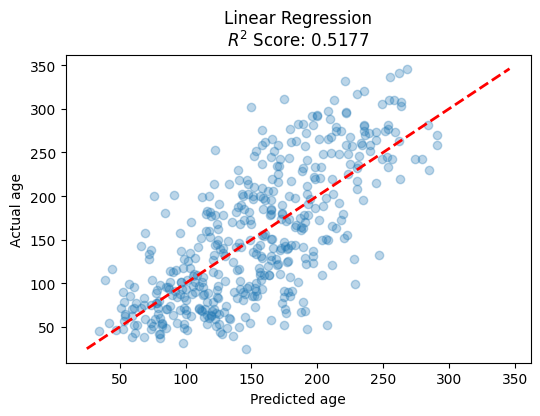

0.5177170179957553

In [21]:
evaluate_and_plot(LinearRegression(), X, y, "Linear Regression")

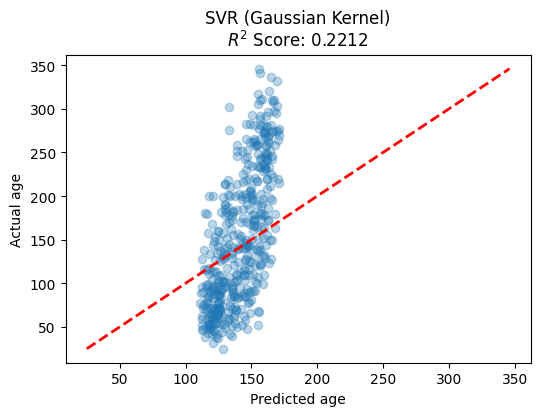

0.2212307796443237

In [22]:
evaluate_and_plot(SVR(kernel='rbf'), X_scaled, y, "SVR (Gaussian Kernel)")

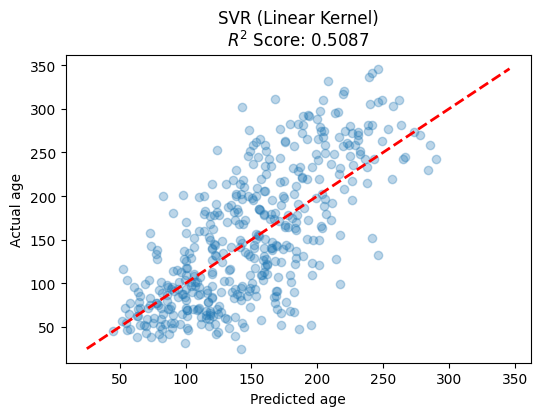

0.5087403352603336

In [23]:
evaluate_and_plot(SVR(kernel='linear'), X_scaled, y, "SVR (Linear Kernel)")

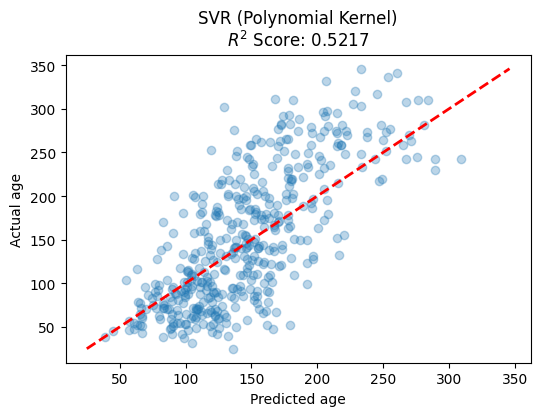

0.5216624386451807

In [24]:
evaluate_and_plot(SVR(kernel='poly', degree=3, coef0=1), X_scaled, y, "SVR (Polynomial Kernel)")

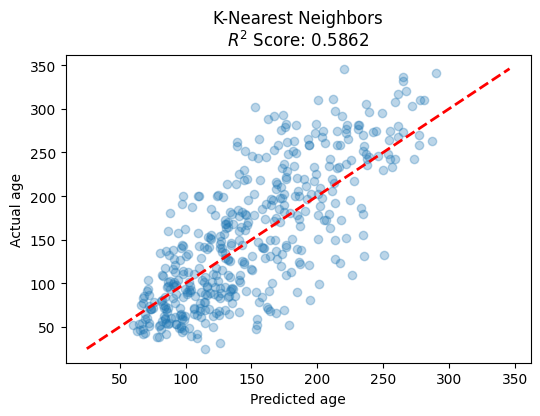

0.5862402805507108

In [25]:
evaluate_and_plot(KNeighborsRegressor(n_neighbors=5), X_scaled, y, "K-Nearest Neighbors")

/Users/tedvtorov/Desktop/py-proj/MISIS/misis_ml_course_sem6/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


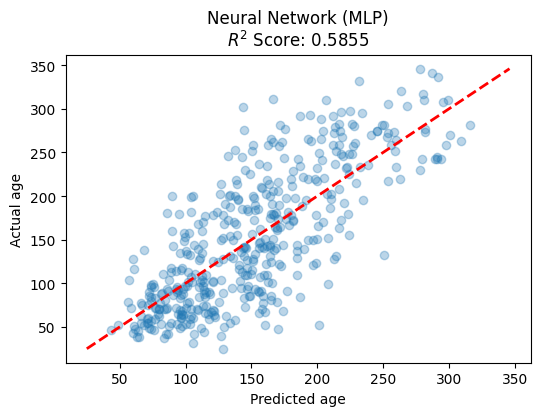

0.5854566487998297

In [26]:
evaluate_and_plot(MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500), X_scaled, y, "Neural Network (MLP)")

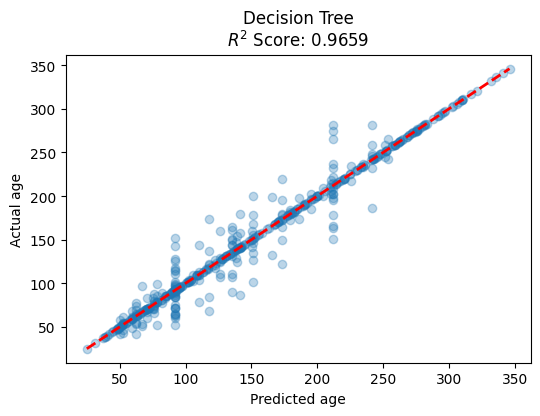

0.9659151839434487

In [27]:
evaluate_and_plot(DecisionTreeRegressor(max_depth=10), X, y, "Decision Tree")

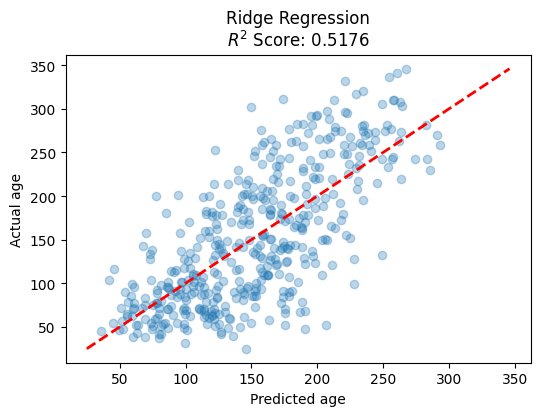

0.517551899533549

In [28]:
evaluate_and_plot(Ridge(alpha=1.0), X_scaled, y, "Ridge Regression")

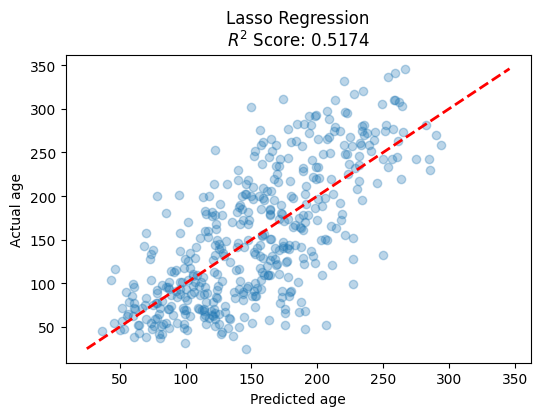

0.5173540416277764

In [29]:
evaluate_and_plot(Lasso(alpha=0.1), X_scaled, y, "Lasso Regression")

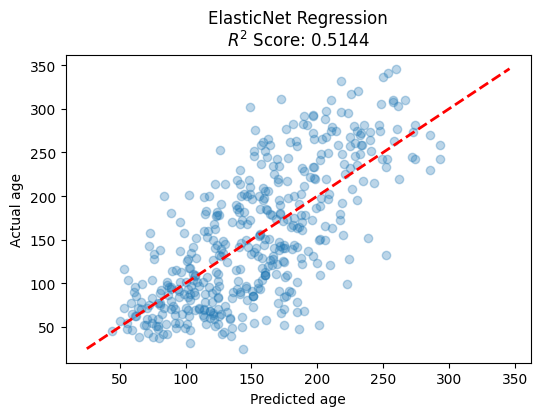

0.5143553651004054

In [30]:
evaluate_and_plot(ElasticNet(alpha=0.1, l1_ratio=0.5), X_scaled, y, "ElasticNet Regression")

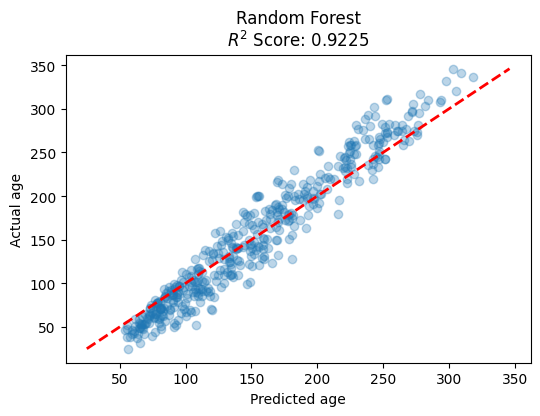

0.9224631339870457

In [31]:
evaluate_and_plot(RandomForestRegressor(n_estimators=100, n_jobs=-1), X, y, "Random Forest")

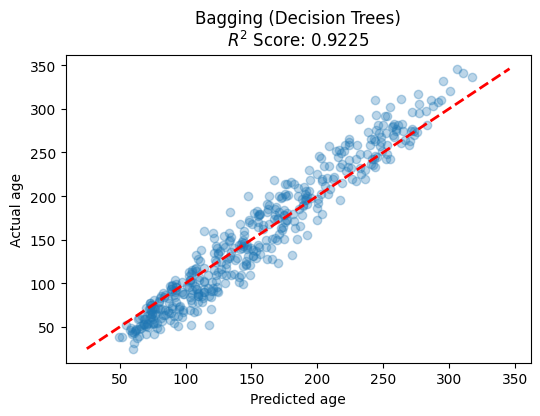

0.9224620361274567

In [32]:
evaluate_and_plot(BaggingRegressor(n_estimators=50, n_jobs=-1), X, y, "Bagging (Decision Trees)")